In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Инерционный или ускоренный градиентный метод

image.png

In [64]:
# Функция и её градиент
def f(x):
    return x**2

def grad_f(x):
    return 2 * x

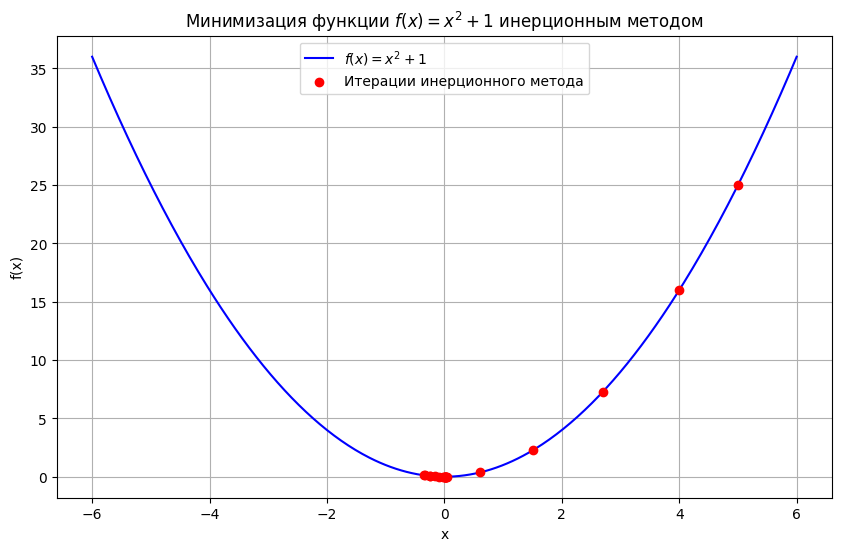

In [65]:
def inertial_gradient_descent(f, grad_f, x0, alpha=0.1, beta=0.9, iterations=100):
    """
    Минимизация функции f инерционным градиентным методом.

    :param f: Целевая функция
    :param grad_f: Градиент целевой функции
    :param x0: Начальное приближение
    :param alpha: Шаг градиентного спуска
    :param beta: Параметр инерции
    :param iterations: Количество итераций
    :return: Приближенное решение x и история значений x
    """
    x = x0
    v = np.zeros_like(x0)  # начальная скорость
    x_history = [x]

    for _ in range(iterations):
        v = beta * v - alpha * grad_f(x)
        x = x + v
        x_history.append(x)

    return x, x_history

# Параметры
x0 = 5.0  # начальное значение
alpha = 0.1  # шаг градиентного спуска
beta = 0.5   # параметр инерции
iterations = 20

# Минимизация
solution, x_history = inertial_gradient_descent(f, grad_f, x0, alpha, beta, iterations)

# Построение графика
x_vals = np.linspace(-6, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 + 1$', color='blue')
plt.scatter(x_history, [f(x) for x in x_history], color='red', label='Итерации инерционного метода', zorder=5)
plt.title('Минимизация функции $f(x) = x^2 + 1$ инерционным методом')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
solution, f(solution)

(0.001399750285482193, 1.9593008617074805e-06)

# Метод Чебышева

image.png

image.png

image.png

где $P_k$ — некоторый многочлен степени $k$

In [22]:
def chebyshev_polynomial(k, x):
    """Вычисление полинома Чебышева первого рода T_k(x)."""
    if k == 0:
        return 1
    elif k == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(k - 1, x) - chebyshev_polynomial(k - 2, x)

def chebyshev_gradient_descent(f, grad_f, x0, alpha, beta, iterations):
    """Метод градиентного спуска с ускорением Чебышева."""
    x = x0
    x_history = [x]

    for k in range(1, iterations + 1):
        x = x - alpha * grad_f(x) / chebyshev_polynomial(k, beta)
        x_history.append(x)

    return x_history

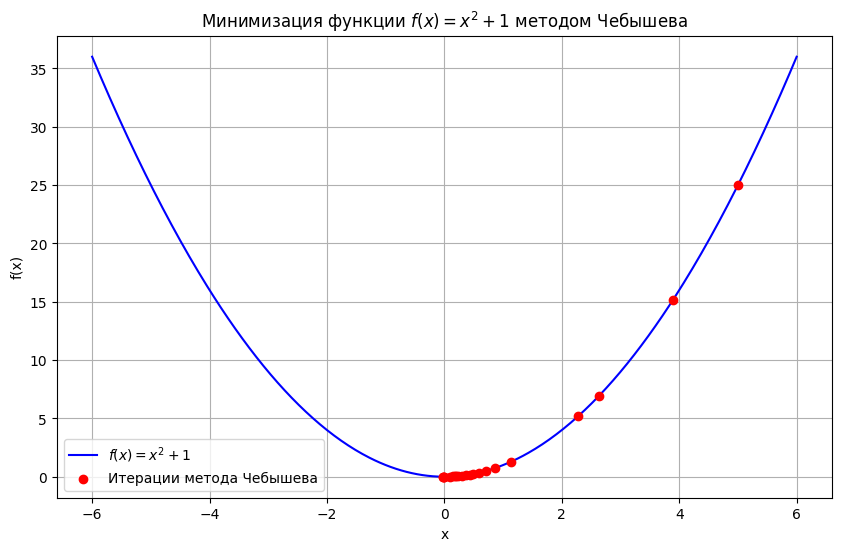

In [23]:
# Параметры
x0 = 5.0  # начальное значение
alpha = 0.1  # шаг градиентного спуска
beta = 0.9   # параметр ускорения
iterations = 20

# Минимизация
x_history = chebyshev_gradient_descent(f, grad_f, x0, alpha, beta, iterations)

# Построение графика
x_vals = np.linspace(-6, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 + 1$', color='blue')
plt.scatter(x_history, [f(x) for x in x_history], color='red', label='Итерации метода Чебышева', zorder=5)
plt.title('Минимизация функции $f(x) = x^2 + 1$ методом Чебышева')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
x_history[-1], f(x_history[-1])

(-0.020893355111729562, 0.0004365322878248358)

# Метод сопряженных градиентов

**для любой квадратной матрицы $A$ размера $n\times n$ существует многочлен $P$ степени не больше $n$, для которого $P(A)=0$.**

image.png

**на каждой итерации выбираются параметры, дающие наилучший многочлен, который можно построить учитывая все сделанные до текущего шага измерения градиента.**

In [37]:
def conjugate_gradient(A, b, n, x0=None, tol=1e-8):
    """
    Решение системы Ax = b методом сопряженных градиентов.

    :param A: Симметричная положительно определенная матрица
    :param b: Вектор правой части
    :param n: Максимальное количество итераций
    :param x0: Начальное приближение решения (по умолчанию — нулевой вектор)
    :param tol: Допустимая погрешность сходимости
    :return: Вектор решения x
    """
    # Инициализация
    if x0 is None:
        x = np.zeros_like(b)
    else:
        x = x0

    r = b - np.dot(A, x)
    p = r.copy()
    rs_old = np.dot(r, r)

    for i in range(n):
        Ap = np.dot(A, p)
        alpha = rs_old / np.dot(p, Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rs_new = np.dot(r, r)

        if np.sqrt(rs_new) < tol:
            print(f"Сошлось за {i+1} итераций.")
            break

        p = r + (rs_new / rs_old) * p
        rs_old = rs_new

    return x

In [38]:
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
n = 1000

solution = conjugate_gradient(A, b, n)
print("Приближенное решение:", solution)

Сошлось за 2 итераций.
Приближенное решение: [0.09090909 0.63636364]


# метод Нестерова

image.png

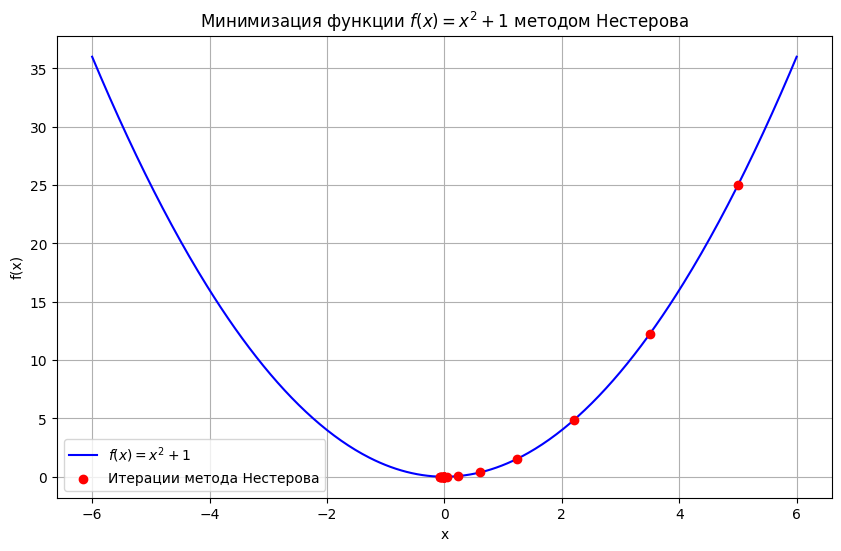

In [48]:
def nesterov_accelerated_gradient(f, grad_f, x0, alpha=0.1, beta=0.9, iterations=100):
    """
    Минимизация функции f методом Нестерова.

    :param f: Целевая функция
    :param grad_f: Градиент целевой функции
    :param x0: Начальное приближение
    :param alpha: Шаг градиентного спуска
    :param beta: Параметр ускорения
    :param iterations: Количество итераций
    :return: Приближенное решение x и история значений x
    """
    x = x0
    y = x0
    x_history = [x]

    for _ in range(iterations):
        y_next = x - alpha * grad_f(x)
        x = y_next + beta * (y_next - y)
        y = y_next

        x_history.append(x)

    return x, x_history

# Параметры
x0 = 5.0  # начальное значение
alpha = 0.1  # шаг градиентного спуска
beta = 0.5   # параметр ускорения
iterations = 20

# Минимизация
solution, x_history = nesterov_accelerated_gradient(f, grad_f, x0, alpha, beta, iterations)

# Построение графика
x_vals = np.linspace(-6, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 + 1$', color='blue')
plt.scatter(x_history, [f(x) for x in x_history], color='red', label='Итерации метода Нестерова', zorder=5)
plt.title('Минимизация функции $f(x) = x^2 + 1$ методом Нестерова')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
solution, f(solution)

(0.000557904386903245, 3.1125730492588574e-07)

# Стохастический градиентный спуск (SGD)

Единственное формальное отличие от обычного градиентного спуска — использование вместо градиента функции $g(x, \theta)$ такой, что $E_\theta g(x,\theta)=\nabla f(x)$ ($E_\theta$ — математическое ожидание по случайной величине $\theta$), таким образом стохастический градиентный спуск имеет вид:

image.png

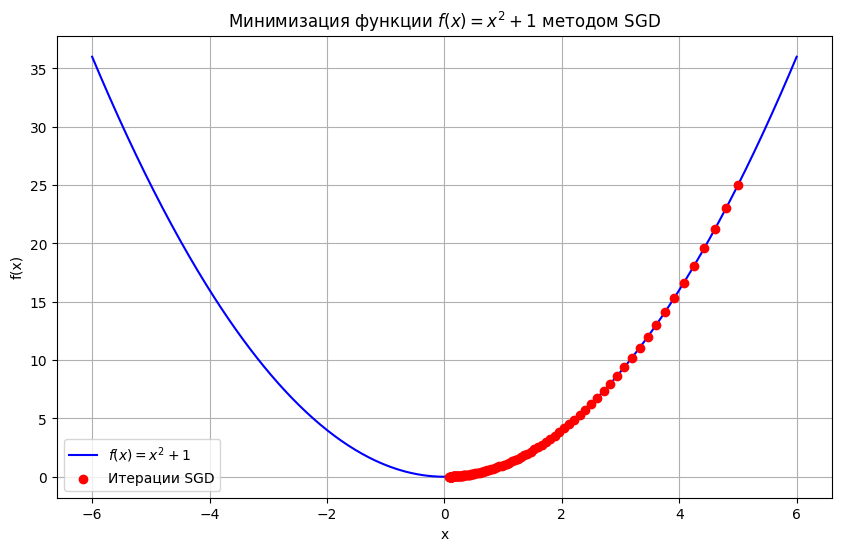

In [52]:
def stochastic_gradient_descent(f, grad_f, x0, alpha=0.01, iterations=100, batch_size=1):
    """
    Минимизация функции f методом стохастического градиентного спуска.

    :param f: Целевая функция
    :param grad_f: Градиент целевой функции
    :param x0: Начальное приближение
    :param alpha: Шаг градиентного спуска
    :param iterations: Количество итераций
    :param batch_size: Размер мини-батча
    :return: Приближенное решение x и история значений x
    """
    x = x0
    x_history = [x]

    for _ in range(iterations):
        # Вычисление градиента на случайном примере (или мини-батче)
        grad = grad_f(x)
        x = x - alpha * grad
        x_history.append(x)

    return x, x_history

# Параметры
x0 = 5.0  # начальное значение
alpha = 0.02  # шаг градиентного спуска
iterations = 100
batch_size = 1  # размер мини-батча

# Минимизация
solution, x_history = stochastic_gradient_descent(f, grad_f, x0, alpha, iterations, batch_size)

x_vals = np.linspace(-6, 6, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 + 1$', color='blue')
plt.scatter(x_history, [f(x) for x in x_history], color='red', label='Итерации SGD', zorder=5)
plt.title('Минимизация функции $f(x) = x^2 + 1$ методом SGD')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
solution, f(solution)

(0.08435159679424827, 0.007115191881739434)

# Субградиентный спуск

**субградиентный спуск не сходится при постоянном размере шага**

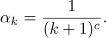

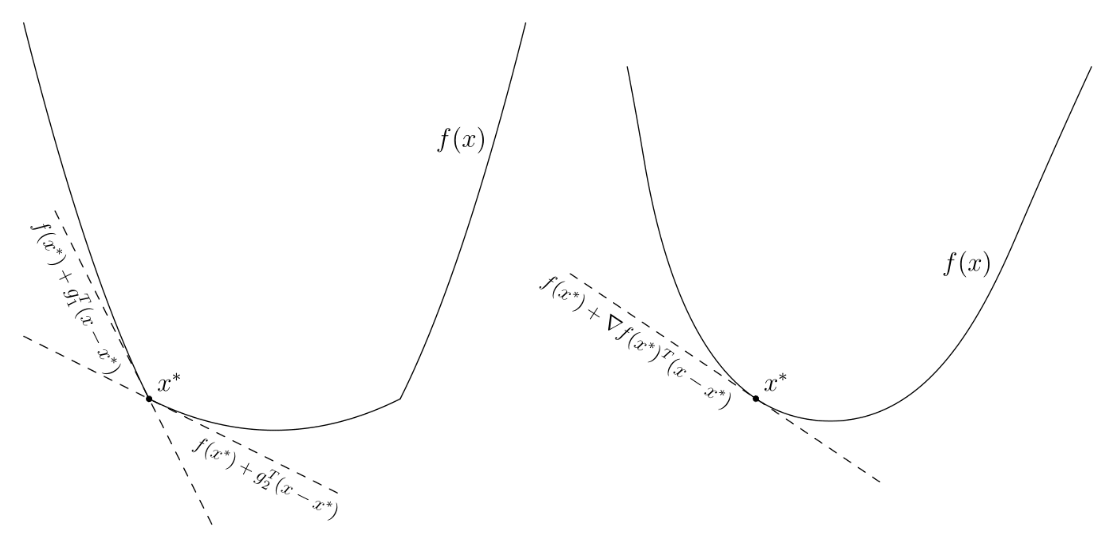

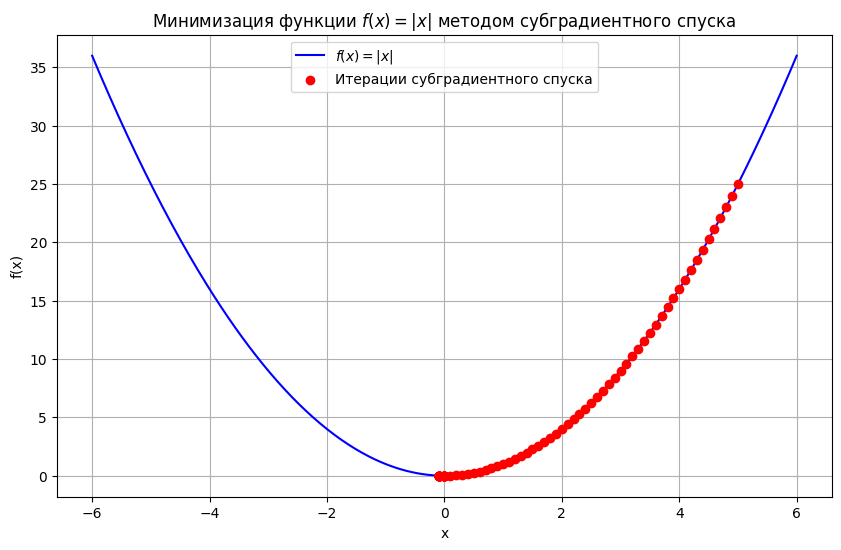

In [57]:
def subgradient_descent(f, subgrad_f, x0, alpha=0.1, iterations=100):
    """
    Минимизация функции f методом субградиентного спуска.

    :param f: Целевая функция
    :param subgrad_f: Субградиент целевой функции
    :param x0: Начальное приближение
    :param alpha: Шаг спуска
    :param iterations: Количество итераций
    :return: Приближенное решение x и история значений x
    """
    x = x0
    x_history = [x]

    for _ in range(iterations):
        subgrad = subgrad_f(x)
        x = x - alpha * subgrad
        x_history.append(x)

    return x, x_history

def subgrad_f(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0  # В точке x = 0 субградиент может быть любым значением в [-1, 1]

# Параметры
x0 = 5.0  # начальное значение
alpha = 0.1  # шаг спуска
iterations = 100

# Минимизация
solution, x_history = subgradient_descent(f, subgrad_f, x0, alpha, iterations)

# Построение графика
x_vals = np.linspace(-6, 6, 400)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = |x|$', color='blue')
plt.scatter(x_history, [f(x) for x in x_history], color='red', label='Итерации субградиентного спуска', zorder=5)
plt.title('Минимизация функции $f(x) = |x|$ методом субградиентного спуска')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
solution, f(solution)

(1.0269562977782698e-15, 1.0546392375464504e-30)

# Proximal методы

Идея очень простая: если есть функция $f$, представимая в виде суммы $f(x)=\varphi(x)+h(x)$, где $\varphi$ — дифференцируемая выпуклая функция, а $h(x)$ — выпуклая, для которой существует специальный proximal-оператор $prox_h(x)$, то свойства сходимости градиентного спуска для $\varphi$ остаются и для градиентного спуска для $f$, если после каждой итерации применять этот proximal-оператор для текущей точки $x_k$, другими словами общий вид proximal-метода выглядит так:

image.png

proximal-оператор:

$h(x)$ — индикатор-функция выпуклого множества $\mathcal{K}$, то есть

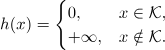

В этом случае $prox_{\alpha_kh}(x)$ — это проекция на множество $\mathcal{K}$, то есть «ближайшая к $x$ точка множества $\mathcal{K}$». Таким образом, мы ограничиваем градиентный спуск только на множество $\mathcal{K}$, что позволяет решать задачи с ограничениями. К сожалению, вычисление проекции в общем случае может быть еще более сложной задачей, поэтому обычно такой метод применяется, если ограничения имеют простой вид, например так называемые box-ограничения: по каждой координате:

image.png

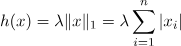
— $\ell_1$-регуляризация. Такое слагаемое любят добавлять в задачи оптимизации в машинном обучении, чтобы избежать переобучения. Регуляризация такого вида еще и имеет тенденцию обнулять наименее значимые компоненты. Для такой функции proximal-оператор имеет вид (ниже описано выражение для одной координаты):

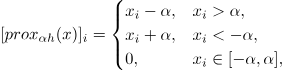

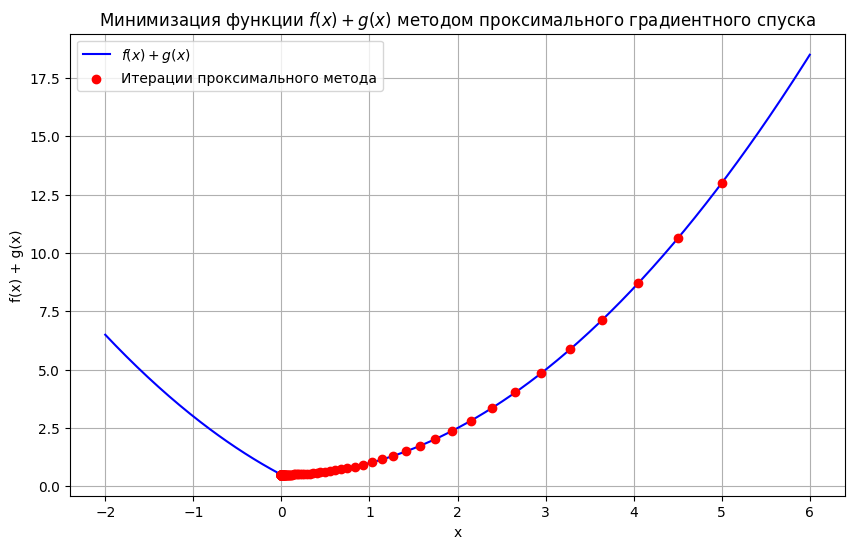

In [60]:
def proximal_gradient_descent(f, grad_f, g, prox_g, x0, alpha=0.1, iterations=100):
    """
    Минимизация функции f + g методом проксимального градиентного спуска.

    :param f: Гладкая часть целевой функции
    :param grad_f: Градиент гладкой части
    :param g: Негладкая часть целевой функции
    :param prox_g: Проксимальный оператор для g
    :param x0: Начальное приближение
    :param alpha: Шаг спуска
    :param iterations: Количество итераций
    :return: Приближенное решение x и история значений x
    """
    x = x0
    x_history = [x]

    for _ in range(iterations):
        grad = grad_f(x)
        x = prox_g(x - alpha * grad, alpha)
        x_history.append(x)

    return x, x_history

# Гладкая часть функции и её градиент
def f(x):
    return 0.5 * (x - 1)**2

def grad_f(x):
    return x - 1

# Негладкая часть функции и её проксимальный оператор
def g(x):
    return abs(x)

def prox_g(v, alpha):
    return np.sign(v) * max(abs(v) - alpha, 0)

# Параметры
x0 = 5.0  # начальное значение
alpha = 0.1  # шаг спуска
iterations = 190

# Минимизация
solution, x_history = proximal_gradient_descent(f, grad_f, g, prox_g, x0, alpha, iterations)

# Построение графика
x_vals = np.linspace(-2, 6, 400)
y_vals = [f(x) + g(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) + g(x)$', color='blue')
plt.scatter(x_history, [f(x) + g(x) for x in x_history], color='red', label='Итерации проксимального метода', zorder=5)
plt.title('Минимизация функции $f(x) + g(x)$ методом проксимального градиентного спуска')
plt.xlabel('x')
plt.ylabel('f(x) + g(x)')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
solution, f(solution)

(1.0116884635591461e-08, 0.4999999898831154)